<a href="https://colab.research.google.com/github/jmoralespineda/SENALES_Y_SISTEMAS/blob/main/Taller_2_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TALLER 2 DE SEÑALES Y SISTEMAS

## Transformada de Laplce primera parte

##Punto 1

Ejercicios propuestos del cuaderno de convolución:
https://github.com/jmoralespineda/SENALES_Y_SISTEMAS/blob/main/2_SLIT_Ejercicios/2_Convolucion.ipynb

##Punto 2

Ejercicios propuestos del cuaderno de Respuesta Impulso:
https://github.com/jmoralespineda/SENALES_Y_SISTEMAS/blob/main/2_SLIT_Ejercicios/1_Respuesta_Impulso.ipynb

##Punto 3

Demostración de si lo siguientes sistemas son y = H{x} son sistemas lineales e invariantes en el tiempo.(SLIT):
https://github.com/jmoralespineda/SENALES_Y_SISTEMAS/blob/main/TALLER_2/punto%203%20taller.pdf

##Simulación en Python del punto 3.

##SISTEMA 1 con realimentación:#
$y[n] = \frac{x[n]}{3} + 2x[n-1] - y[n-1]$ .


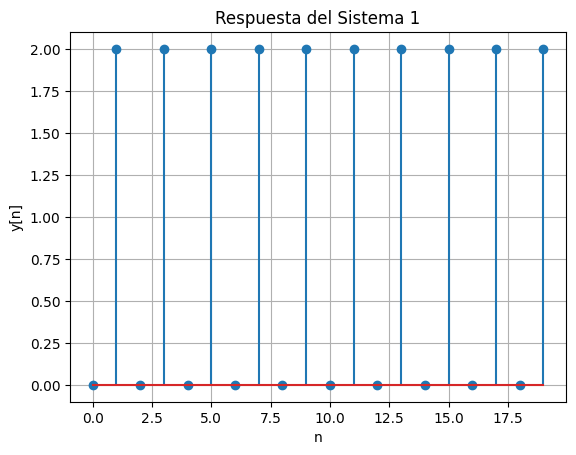

In [ ]:
# SISTEMA_1_SLIT
import numpy as np
import matplotlib.pyplot as plt

def sistema1(x):
    y = np.zeros_like(x)
    for n in range(1, len(x)):
        y[n] = x[n]/3 + 2*x[n-1] - y[n-1]
    return y

# Señal de prueba
n = np.arange(0, 20)
x = np.ones_like(n)  # escalón unitario
y = sistema1(x)

plt.stem(n, y)
plt.title("Respuesta del Sistema 1")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

##SISTEMA 2 - sumatoria no lineal#
$y[n] = \sum_{k=-\infty}^{n} x^2[k]$

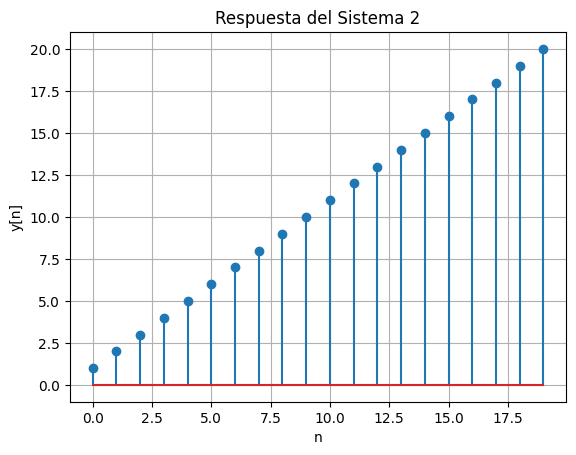

In [ ]:
# SISTEMA 2 - NO ES SLIT
def sistema2(x):
    y = np.zeros_like(x)
    for n in range(len(x)):
        y[n] = np.sum(x[:n+1]**2)
    return y

x = np.ones_like(n)
y = sistema2(x)

# Gráfica
plt.stem(n, y)
plt.title("Respuesta del Sistema 2")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

# SISTEMA 3 - filtro de mediana sobre ventana de 3 muestras
$y[n] = \mathrm{median}(x[n-1],\, x[n],\, x[n+1])$

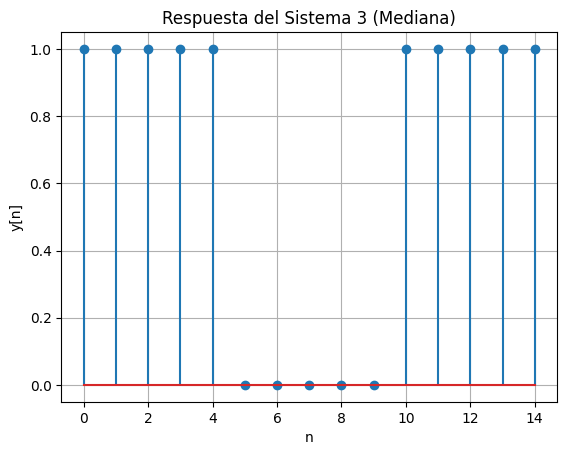

In [ ]:
# SISTEMA 3 - NO ES SLIT
from scipy.signal import medfilt
import numpy as np # Import numpy as it's used later
import matplotlib.pyplot as plt # Import matplotlib as it's used later

def sistema3(x):
    return medfilt(x, kernel_size=3)

x = np.concatenate((np.ones(5), np.zeros(5), np.ones(5)))
y = sistema3(x)

plt.stem(np.arange(len(x)), y)
plt.title("Respuesta del Sistema 3 (Mediana)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

#SISTEMA 4 - relación afín en tiempo continuo#
$y(t) = A \cdot x(t) + B \qquad \text{con } A, B \in \mathbb{R}$

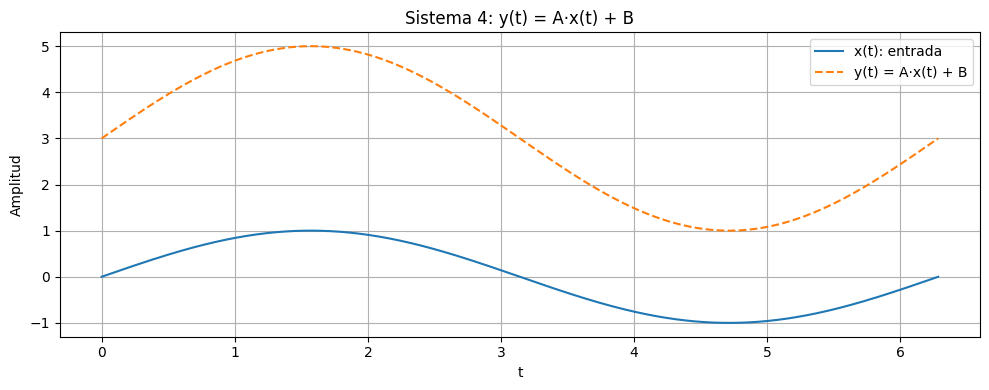

In [ ]:
# SISTEMA 4 - NO ES SLIT
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros del sistema
A = 2
B = 3

# Señal de entrada x(t): por ejemplo, una onda senoidal
t = np.linspace(0, 2*np.pi, 1000)
x = np.sin(t)

# Aplicamos el sistema: y(t) = A * x(t) + B
y = A * x + B

# Graficamos
plt.figure(figsize=(10, 4))
plt.plot(t, x, label='x(t): entrada')
plt.plot(t, y, label='y(t) = A·x(t) + B', linestyle='--')
plt.title("Sistema 4: y(t) = A·x(t) + B")
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##PUNTO 4

Hallar la salida y[n] de un SLIT ante la entrada x[n]={−15, 5,−3†, 0, 5, 7,−1}, con respuesta al impulso h[n]={1,−2, 0†, 1,−2}, donde n∈{0,±1,±2, . . . ,±N} y n=0 para x[n]†.

- Dada la respuesta al impulso en tiempo discreto $h[n]\in\mathbb{R},\mathbb{C}$ de un SLIT $\mathsf{H}\{\cdot\},$ la respuesta del sistema $y[n]\in\mathbb{R},\mathbb{C}$ ante la entrada discreta $x[n]\in\mathbb{R},\mathbb{C}$, se puede calcular mediante el operador convolución:

$$y[n]=x[n]*h[n] = \sum^\infty_{k=-\infty}x[k]h[n-k]$$


- En general, se cuenta con vectores de tamaño finito, y con sistemas causales, por ende, si $x[n]$ cuenta con $N$ elementos y $h[n]$ con $L$ elementos, la salida $y[n]$ tendra, en el mejor de los casos, $M = N + L - 1$ elementos distintos de 0.

Se presenta la simulación del cálculo de la salida de un SLIT en tiempo discreto utilizando la respuesta al impulso y la convolución discreta implementando punto a punto el proceso de suma y comparando los resultados con la librería [convolve]

**CELDA 1: Imports y configuración interactiva**

In [ ]:
%matplotlib inline
from ipywidgets import interact #crear graficos interactivos
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal #crear señales prototipo en tiempo discreto

**CELDA 2: Definir señales correctas (conforme al enunciado)**

In [ ]:
# Entrada x[n] y respuesta al impulso h[n]
x = np.array([-15, 5, -3, 0, 5, 7, -1]).reshape(-1, 1)  # n=0 está en índice 2
h = np.array([1, -2, 0, 1, -2]).reshape(-1, 1)          # n=0 está en índice 2

**CELDA 3: Funciones convgraf() y plot_conv()**

In [ ]:
def convgraf(h, x):
    lx = len(x)
    lh = len(h)
    M = lx + lh - 1  # longitud de la salida
    xm = np.zeros((lh, M))  # almacenamiento de x reflejado y desplazado
    ym = np.zeros(M)        # salida final

    # Reflejar x[k] -> x[-k]
    x_flip = np.flip(x, axis=0).flatten()

    for i in range(M):
        # Desplazar x_flip para formar x[k] en n = i
        x_shift = np.zeros(lh)
        for j in range(lh):
            if 0 <= i - j < lx:
                x_shift[j] = x_flip[i - j]
        xm[:, i] = x_shift
        ym[i] = np.dot(x_shift, h.flatten())  # producto punto

    return xm, ym, h



**CELDA 4: Ejecutar la convolución y visualizarla**

In [ ]:
def plot_conv(k, xm, ym, h):
    plt.figure(figsize=(10, 5))

    plt.stem(xm[:, k], markerfmt='+', label='$x[k]$ desplazado')  # x reflejado y desplazado
    plt.stem(h, linefmt='g', markerfmt='.', label='$h[n-k]$')     # h fija
    plt.stem(ym[:k+1], markerfmt='s', linefmt='r', label='$y[n]$ acumulada')  # salida parcial

    plt.title('Proceso de convolución: $y[n] = x[n] * h[n]$', fontsize=14)
    plt.xlabel('n (índice de tiempo discreto)', fontsize=12)
    plt.ylabel('Amplitud', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()




In [ ]:
xm, ym, h_used = convgraf(h, x)

@interact(k=(0, len(ym)-1, 1))
def show_frame(k=0):
    plot_conv(k, xm, ym, h_used)


interactive(children=(IntSlider(value=0, description='k', max=10), Output()), _dom_classes=('widget-interact',…

In [ ]:
# Calcular índice de n=0 en la salida
n0_x = 2  # n=0 en x
n0_h = 2  # n=0 en h
n0_y = n0_x + n0_h  # n=0 en y

# Crear eje temporal para y[n]
n_y = np.arange(-n0_y, len(ym) - n0_y)

# Mostrar resultados
print("Salida completa de la convolución y[n]:\n")
for n_val, y_val in zip(n_y, ym):
    print(f"n = {n_val:>2} --> y[n] = {y_val:>6.1f}")


Salida completa de la convolución y[n]:

n = -4 --> y[n] =   -1.0
n = -3 --> y[n] =    9.0
n = -2 --> y[n] =   -9.0
n = -1 --> y[n] =  -11.0
n =  0 --> y[n] =    6.0
n =  1 --> y[n] =    2.0
n =  2 --> y[n] =  -35.0
n =  3 --> y[n] =   27.0
n =  4 --> y[n] =   11.0
n =  5 --> y[n] =  -25.0
n =  6 --> y[n] =   30.0


### Parte 2: Respuesta al escalón

Para esta parte del ejercicio, se analiza la respuesta del sistema \( s[n] \), dada por:

\[
s[n] = \{-1,\ 6,\ -10,\ \mathbf{3}^\dagger,\ 1,\ -10,\ 2,\ 5\}
\]

donde el valor con el símbolo \( \dagger \) (el número 3) corresponde al instante \( n = 0 \).  
Este tipo de respuesta puede interpretarse como una **respuesta al escalón unitario**, es decir, cómo responde el sistema cuando la entrada es:

\[
u[n] = \begin{cases}
1, & n \geq 0 \\
0, & n < 0
\end{cases}
\]

La relación entre la respuesta al escalón \( s[n] \) y la respuesta al impulso \( h[n] \) es:

\[
h[n] = s[n] - s[n-1]
\]

En esta parte, simplemente analizamos cómo la entrada \( x[n] \) excita un sistema con esta respuesta, usando convolución discreta:  
\[
y[n] = x[n] * s[n]
\]

El resultado de esta convolución representa la salida del sistema con entrada \( x[n] \) y una **respuesta escalonada**, no impulsiva.


In [ ]:
# Nueva respuesta al escalón s[n]
s = np.array([-1, 6, -10, 3, 1, -10, 2, 5]).reshape(-1, 1)  # n = 0 en índice 3

# Convolución con la nueva "respuesta al sistema"
def convgraf_step(s, x):
    lx = len(x)
    lh = len(s)
    M = lx + lh - 1
    xm = np.zeros((lh, M))
    ym = np.zeros(M)

    x_flip = np.flip(x, axis=0).flatten()

    for i in range(M):
        x_shift = np.zeros(lh)
        for j in range(lh):
            if 0 <= i - j < lx:
                x_shift[j] = x_flip[i - j]
        xm[:, i] = x_shift
        ym[i] = np.dot(x_shift, s.flatten())

    return xm, ym, s

# Ejecutamos
xm_step, ym_step, s_used = convgraf_step(s, x)

# Visualización paso a paso con etiquetas
def plot_step(k, xm, ym, s):
    plt.figure(figsize=(10, 5))
    plt.stem(xm[:, k], markerfmt='+', label='$x[k]$ desplazado')
    plt.stem(s, linefmt='g', markerfmt='.', label='$s[n-k]$')
    plt.stem(ym[:k+1], markerfmt='s', linefmt='r', label='$y[n]$')
    plt.title('Convolución con respuesta al escalón: $y[n] = x[n] * s[n]$', fontsize=14)
    plt.xlabel('n (índice de tiempo discreto)', fontsize=12)
    plt.ylabel('Amplitud', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Widget interactivo
@interact(k=(0, len(ym_step)-1, 1))
def show_step_frame(k=0):
    plot_step(k, xm_step, ym_step, s_used)


interactive(children=(IntSlider(value=0, description='k', max=13), Output()), _dom_classes=('widget-interact',…

Salida completa de la convolución con respuesta al escalón s[n]:

n = -5 --> y[n] =    1.0
n = -4 --> y[n] =  -13.0
n = -3 --> y[n] =   47.0
n = -2 --> y[n] =  -43.0
n = -1 --> y[n] =  -27.0
n =  0 --> y[n] =    9.0
n =  1 --> y[n] =    8.0
n =  2 --> y[n] = -190.0
n =  3 --> y[n] =  207.0
n =  4 --> y[n] =   15.0
n =  5 --> y[n] =  -71.0
n =  6 --> y[n] =  145.0
n =  7 --> y[n] =   -5.0
n =  8 --> y[n] =  -75.0


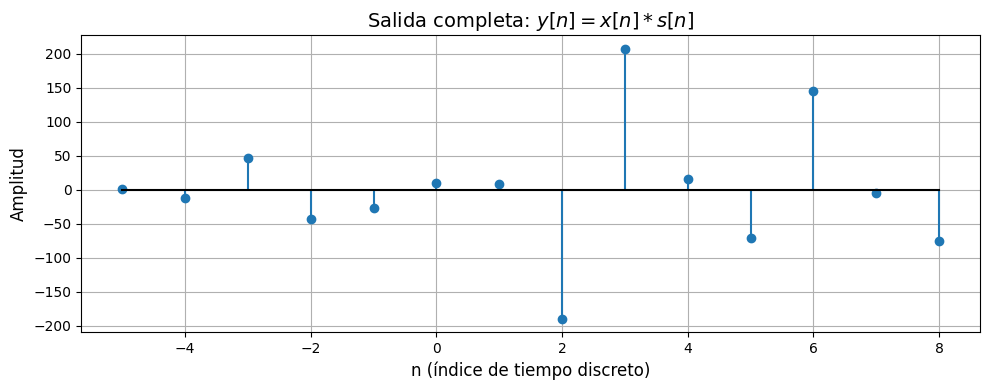

In [ ]:
# Índice de n=0 en x[n] y s[n]
n0_x = 2
n0_s = 3
n0_y_step = n0_x + n0_s  # índice de n=0 en la convolución y[n]

# Eje de tiempo asociado a la salida
n_y_step = np.arange(-n0_y_step, len(ym_step) - n0_y_step)

# Mostrar resultados numéricos
print("Salida completa de la convolución con respuesta al escalón s[n]:\n")
for n_val, y_val in zip(n_y_step, ym_step):
    print(f"n = {n_val:>2} --> y[n] = {y_val:>6.1f}")

# Graficar la salida completa
plt.figure(figsize=(10, 4))
# Remove the 'use_line_collection=True' argument as it's deprecated in newer matplotlib versions
plt.stem(n_y_step, ym_step, basefmt='k')
plt.title('Salida completa: $y[n] = x[n] * s[n]$', fontsize=14)
plt.xlabel('n (índice de tiempo discreto)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()